## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

# Regression
When the target variable is a numerical variable then we refer to this task as a regression task.

Examples of regression tasks:
- Predict the price people are willing to pay for a house.
- Predict the salary a student will earn in the future.

Examples of machine learning algorithms that we could use for regression:
- Decision trees
- Random forests
- Linear regression
- Neural networks

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
penguins = penguins.dropna() # removing a low amount of na's

In [5]:
features= ['body_mass_g']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(penguins[features], penguins['bill_length_mm'])

DecisionTreeRegressor(max_depth=3)

In [6]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [7]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [8]:
predictionsOnTrainset = dt_regression.predict(penguins[features])
predictionsOnTestset = dt_regression.predict(penguins[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins.bill_length_mm)
rmseTest = calculate_rmse(predictionsOnTestset, penguins.bill_length_mm)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 4.266950627893799
RMSE on test set 4.266950627893799


The difference seems to be very minimal, this means the training set can probably predict the output very well. The errors SHOULD be minimal, but you're never sure.

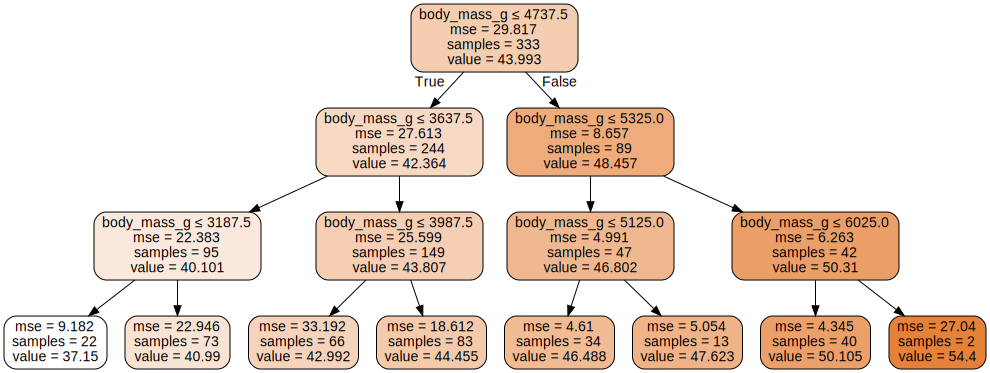

In [9]:
plot_tree_regression(dt_regression, features)